# Introduction to `networkx`

**NetworkX: Network Analysis in Python**

<img src="https://networkx.org/_static/networkx_logo.svg" width="400px" />

> NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Main features:

- Data structures for graphs, digraphs, and multigraphs
- Many standard graph algorithms
- Network structure and analysis measures

:::{note}
Documentation for this package is available at https://networkx.github.io/.
:::

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via Google Colab. Click on the rocket in the top right corner and launch "Colab". If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install the following packages by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install numpy networkx pandas matplotlib
```
:::

In [2]:
import warnings
warnings.filterwarnings("ignore")

Let's perform some network analysis on this simple graph:

<img src="https://raw.githubusercontent.com/fneum/data-science-for-esm/main/data-science-for-esm/network.png" width="300px" />

## Network Analysis with `numpy`.

In [3]:
import numpy as np

Say we want to calculate the Laplacian $L$ of this graph based on its incidence matrix $K$. We first need to write down the incidence matrix $K$ as a `np.array`. Let's also use the convention that edges are oriented such that they are directed at the node with the higher label value (i.e. from node 1 to node 2, not vice versa).

In [4]:
K = np.array([
    [1, -1, 0, 0],
    [1, 0, -1, 0],
    [0, 1, -1, 0],
    [0, 0, 1, -1],
]).T
K

array([[ 1,  1,  0,  0],
       [-1,  0,  1,  0],
       [ 0, -1, -1,  1],
       [ 0,  0,  0, -1]])

To calculate the Laplacian matrix, we form a dot product of the incidence matrix with its transpose:

In [5]:
L = K.dot(K.T)
L

array([[ 2, -1, -1,  0],
       [-1,  2, -1,  0],
       [-1, -1,  3, -1],
       [ 0,  0, -1,  1]])

This is all fine for small graphs, but inconvient for larger graphs. Let's take the help some Python packages have to offer...

## Making our life easier with `networkx`

First, let's import the library. It is commonly imported under the alias `nx`.

In [6]:
import networkx as nx

This is how we can create an empty graph with no nodes and no edges.

In [7]:
G = nx.Graph()

### Nodes

We can add one node at a time,

In [8]:
G.add_node(1)

with attributes

In [9]:
G.add_node(2, country='DE')

or add nodes from a list

In [10]:
G.add_nodes_from([3,4])

We can also add nodes along with node attributes if your container yields 2-tuples of the form `(node, node_attribute_dict)`:

In [11]:
G.add_nodes_from([
    (5, {"color": "red"}),
    (6, {"color": "green"}),
])

### Edges

`G` can also be grown by adding one edge at a time,

In [12]:
G.add_edge(1, 2)

even with attributes

In [13]:
G.add_edge(3, 4, weight=2)

or by adding a list of edges,

In [14]:
G.add_edges_from([(1, 3), (2, 5)])

or as a 3-tuple with 2 nodes followed by an edge attribute dictionary

In [15]:
G.add_edges_from([(2, 3, {'weight': 3})])

### Examining elements of a graph

We can examine the nodes and edges.

In [16]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [17]:
G.number_of_nodes()

6

In [18]:
G.edges

EdgeView([(1, 2), (1, 3), (2, 5), (2, 3), (3, 4)])

In [19]:
G.number_of_edges()

5

### Accessing graph elements

Access an edge:

In [20]:
G.edges[2,3]

{'weight': 3}

Access an attribute of an edge:

In [21]:
G.edges[2,3]['weight']

3

Find all neighbours of node 1:

In [22]:
G[1]

AtlasView({2: {}, 3: {}})

### Removing elements

One can remove nodes and edges from the graph in a similar fashion to adding. Use methods `G.remove_node()`, `G.remove_nodes_from()`, `G.remove_edge()` and `G.remove_edges_from()`, e.g.

In [23]:
G.remove_node(5)

In [24]:
G.remove_edge(2, 5)

NetworkXError: The edge 2-5 is not in the graph

NB: Removing a node will also remove all adjacent edges!

You can remove all nodes and edges with

In [25]:
# G.clear()

### Visualising graphs

A basic drawing function for networks is also available in `networkx`

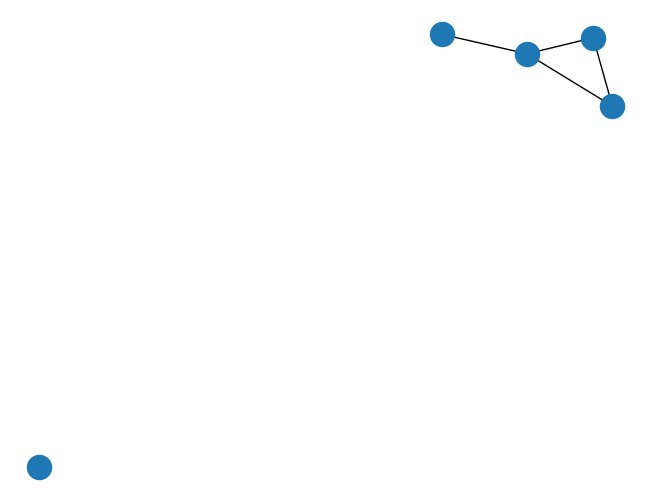

In [26]:
nx.draw(G)

with options for labeling graph elements

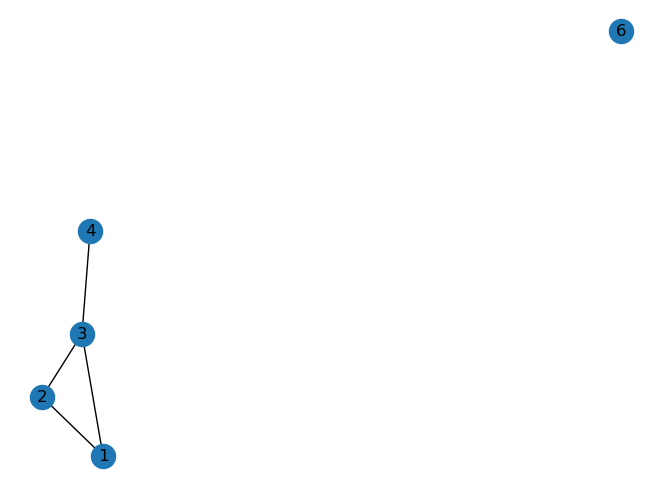

In [27]:
nx.draw(G, with_labels=True)

and integration to `matplotlib`

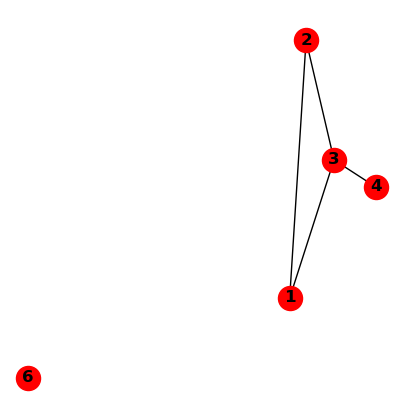

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
nx.draw(G, with_labels=True, ax=ax, node_color='red', font_weight='bold')
plt.savefig("tmp.png")

:::{note}
For a full list of arguments of the function see
https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
:::

### Analysing graphs

The `networkx` library comes with many functions to analyse graphs. Here are a few examples we're going to need for linearised power flow calculations in electricity transmission networks:

Are all nodes in the network connected with each other?

In [29]:
nx.is_connected(G)

False

What are the components that are connected / isolated?

In [30]:
list(nx.connected_components(G))

[{1, 2, 3, 4}, {6}]

Is the network planar? I.e. can the graph be drawn such that edges don't cross?

In [31]:
nx.is_planar(G)

True

What is the frequency of degrees in the network?

In [32]:
nx.degree_histogram(G)

[1, 1, 2, 1]

In [33]:
import pandas as pd
pd.Series(nx.degree_histogram(G))

0    1
1    1
2    2
3    1
dtype: int64

What is the *adjacency matrix*? (Careful, `networkx` will yield a weighted adjacency matrix by default!)

In [34]:
A = nx.adjacency_matrix(G, weight=None).todense()

What is the *incidence matrix*? (Careful, `networkx` will yield a incidence matrix without orientation by default!)

In [35]:
K = nx.incidence_matrix(G, oriented=True).todense()
K

array([[-1., -1.,  0.,  0.],
       [ 1.,  0., -1.,  0.],
       [ 0.,  1.,  1., -1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.]])

What is the *Laplacian matrix*? (Careful, `networkx` will yield a weighted adjacency matrix by default!)

In [36]:
L = nx.laplacian_matrix(G, weight=None).todense()
L

array([[ 2, -1, -1,  0,  0],
       [-1,  2, -1,  0,  0],
       [-1, -1,  3, -1,  0],
       [ 0,  0, -1,  1,  0],
       [ 0,  0,  0,  0,  0]])

What is the *degree matrix*?

In [37]:
G.degree()

DegreeView({1: 2, 2: 2, 3: 3, 4: 1, 6: 0})

Here, we need to do some work to produce a diagonal matrix from the output of `G.degree()`:

In [38]:
degrees = [val for node, val in G.degree()]
D = np.diag(degrees)
D

array([[2, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0]])

Let's do a few checks using different formulas for the *Laplacian matrix*:

$$L = KK^\top$$

In [39]:
K.dot(K.T)

array([[ 2., -1., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.],
       [-1., -1.,  3., -1.,  0.],
       [ 0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [40]:
assert (K.dot(K.T) == L).all()

$$L = D-A$$

In [41]:
D - A

array([[ 2, -1, -1,  0,  0],
       [-1,  2, -1,  0,  0],
       [-1, -1,  3, -1,  0],
       [ 0,  0, -1,  1,  0],
       [ 0,  0,  0,  0,  0]])

In [42]:
assert (D - A == L).all()

Find a cycle basis (i.e. a collection of independent cycles through which all other cycles can be represented through linear combination):

In [43]:
nx.cycle_basis(G)

[[2, 3, 1]]

This function returns a list of sequences. Each sequence indicates a series of nodes to traverse for the respective cycle.

## Linearised power flow in the European transmission network

In this example, we are going to load a slightly simplified dataset of the European high-voltage transmission network. In this dataset, HVDC links and back-to-back converters have been left out, and the data only shows AC transmission lines.

In [44]:
url = "https://tubcloud.tu-berlin.de/s/898dEKqG6XEDqqS/download/nodes.csv"
nodes = pd.read_csv(url, index_col=0)
nodes.head(5)

,x,y
Bus,,
8838,-2.169800,53.243852
7157,11.927347,45.403086
1316,14.475861,40.761821
7421,4.520127,50.488619
1317,14.639282,40.688969


In [45]:
url = "https://tubcloud.tu-berlin.de/s/FmFrJkiWpg2QcQA/download/edges.csv"
edges = pd.read_csv(url, index_col=0)
edges.head(5)

,bus0,bus1,s_nom,x_pu
Line,,,,
8968,1771,1774,491.556019,0.000256
11229,3792,3794,3396.205223,0.000017
11228,3793,3794,3396.205223,0.000012
11227,3793,3796,3396.205223,0.000031
8929,927,929,491.556019,0.000092


`networkx` provides a utility function `nx.from_pandas_edgelist()` to build a network from edges listed in a `pandas.DataFrame`:

In [46]:
N = nx.from_pandas_edgelist(edges, 'bus0', 'bus1', edge_attr=["x_pu", "s_nom"])

We can get some basic info about the graph:

In [52]:
print(G)

Graph with 5 nodes and 4 edges


In [53]:
degrees = [val for node, val in N.degree()]
np.mean(degrees)

2.920158550396376

The `nodes` DataFrame provides us with the coordinates of the graph's nodes. To make the `nx.draw()` function use these coordinates, we need to bring them into a particular format.

```
{nodeA: (x, y),
 nodeB: (x, y),
 nodeC: (x, y)}
```

In [54]:
pos = nodes.apply(tuple, axis=1).to_dict()

Let's just look at the first 5 elements of the dictionary to check:

In [55]:
{k: pos[k] for k in list(pos.keys())[:5]}

{8838: (-2.16979999999999, 53.243852),
 7157: (11.9273472385104, 45.403085502256),
 1316: (14.475861, 40.761821),
 7421: (4.52012724307074, 50.4886188621382),
 1317: (14.639282, 40.688969)}

Now, we can draw the European transmission network:

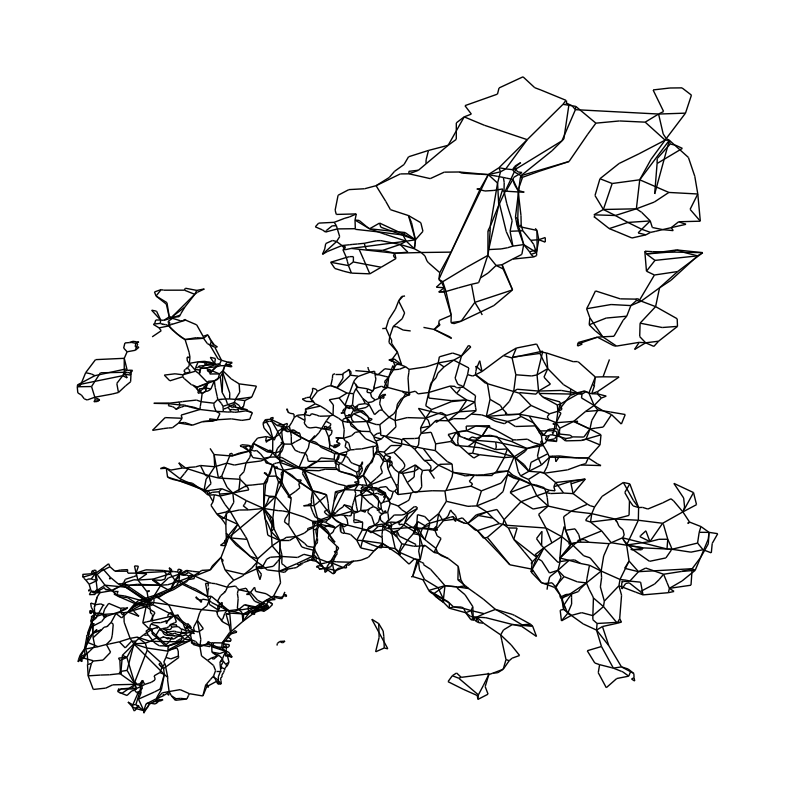

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
nx.draw(N, pos=pos, node_size=0)

You can already see that not all parts of the Network are connected with each other. Ireland, Great Britain, Scandinavia, the Baltics and some Islands in the Mediterranean are not connected to the continental grid. At least not via AC transmission lines. They are through HVDC links and back-to-back converters. These subgraphs denote the different *synchronous zones* of the European transmission network:

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6d/ElectricityUCTE.svg" width="600px" />

In [57]:
len(list(nx.connected_components(N)))

7

Let's build subgraphs for the synchronous zones by iterating over the connected components:

In [58]:
subgraphs = []
for c in nx.connected_components(N):
    subgraphs.append(N.subgraph(c).copy())

We can now color-code them in the network plot:

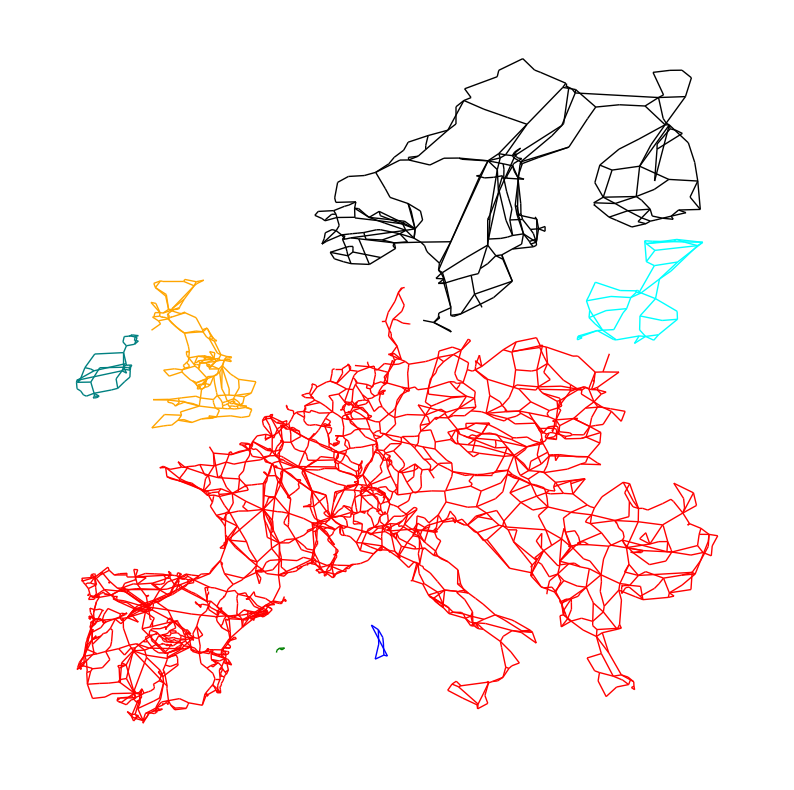

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
colors = ["red", "blue", "green", "orange", "teal", "cyan", "black"]
for i, sub in enumerate(subgraphs):
    sub_pos = {k: v for k, v in pos.items() if k in sub.nodes}
    nx.draw(sub, pos=sub_pos, node_size=0, edge_color=colors[i])

Let's checkout the synchronous zone of Ireland. We want to compute the **Power Transfer Distribution Factor (PTDF)** matrix for this area.

In [60]:
IE = subgraphs[4]

Incidence matrix:

In [61]:
K = nx.incidence_matrix(IE, oriented=True).todense()
K

array([[-1., -1., -1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]])

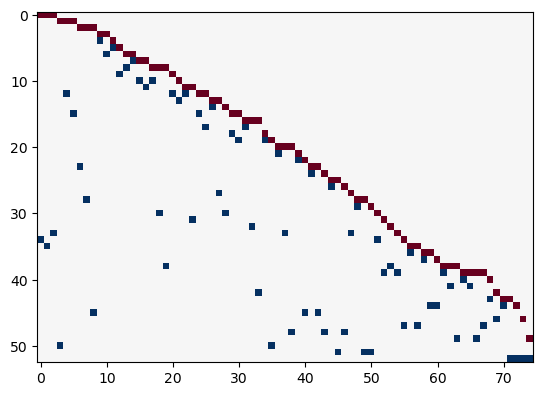

In [62]:
plt.imshow(K, cmap="RdBu")

Unweighted Laplacian:

In [63]:
L = nx.laplacian_matrix(IE, weight=None).todense()
L

array([[ 3,  0,  0, ...,  0,  0,  0],
       [ 0,  3,  0, ..., -1,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       ...,
       [ 0, -1,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  4]])

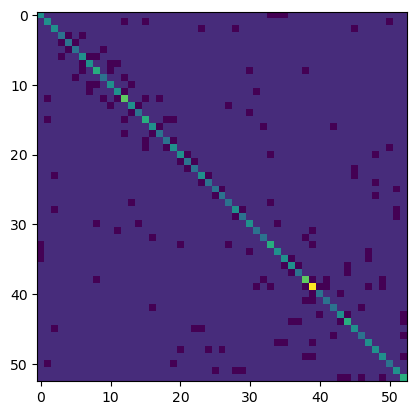

In [64]:
plt.imshow(L, cmap="viridis")

If we want to calculate the weighted Laplacian $L = KBK^\top$, we also need the diagonal matrix $B$ for the susceptances (i.e inverse of reactances):

In [65]:
x_pu = nx.get_edge_attributes(IE, 'x_pu').values()

In [66]:
b = [1 / x for x in x_pu]

In [67]:
B = np.diag(b)

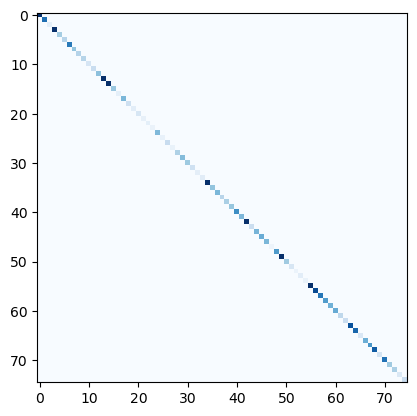

In [68]:
plt.imshow(B, cmap="Blues", vmax=30000)

Now, we can calculate the weighted Laplacian:

In [69]:
H = B.dot(K.T)

In [70]:
L = K.dot(H)

In [71]:
L.min()

-2250413.8608424626

In [72]:
L.max()

2273655.393369115

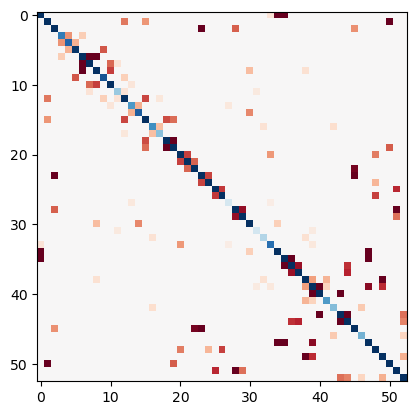

In [73]:
plt.imshow(L, cmap="RdBu", vmax=2e4, vmin=-2e4)

The weighted Laplacian of the network is not invertible, but we can use the [Moore Penrose pseudo-inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse)

In [74]:
L_inv = np.linalg.pinv(L)

or apply a trick by disregarding the first column and row of the weighted Laplacian for inversion:

In [75]:
n_nodes = L.shape[0]

L_inv = np.linalg.inv(L[1:,1:])
L_inv = np.hstack((np.zeros((n_nodes - 1, 1)), L_inv))
L_inv = np.vstack((np.zeros(n_nodes), L_inv))

In [76]:
L_inv.min()

0.0

In [77]:
L_inv.max()

0.0004957770042911583

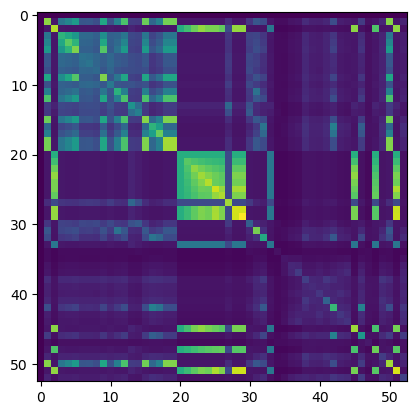

In [78]:
plt.imshow(L_inv, cmap="viridis")

Now, we have all the ingredients to calculate the PTDF matrix

$$f_\ell = \frac{1}{x_\ell}\sum_{i,j} K_{i\ell}  (L^{-1})_{ij} p_j$$
$$f_\ell = \sum_j \text{PTDF}_{\ell j} p_j$$

In [79]:
PTDF = H.dot(L_inv)

In [80]:
PTDF.min()

-0.9999999999999989

In [81]:
PTDF.max()

0.8416043608137512

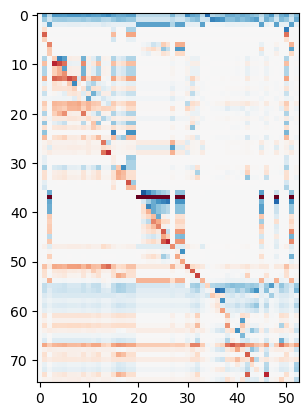

In [82]:
plt.imshow(PTDF, cmap="RdBu", vmin=-1, vmax=1)

This matrix, we can now use to calculate the (linearised) power flow in transmission lines based on nodal power imbalances. Here's an example:

In [83]:
imbalance = np.linspace(-10, 10, len(IE.nodes))
imbalance

array([-10.        ,  -9.61538462,  -9.23076923,  -8.84615385,
        -8.46153846,  -8.07692308,  -7.69230769,  -7.30769231,
        -6.92307692,  -6.53846154,  -6.15384615,  -5.76923077,
        -5.38461538,  -5.        ,  -4.61538462,  -4.23076923,
        -3.84615385,  -3.46153846,  -3.07692308,  -2.69230769,
        -2.30769231,  -1.92307692,  -1.53846154,  -1.15384615,
        -0.76923077,  -0.38461538,   0.        ,   0.38461538,
         0.76923077,   1.15384615,   1.53846154,   1.92307692,
         2.30769231,   2.69230769,   3.07692308,   3.46153846,
         3.84615385,   4.23076923,   4.61538462,   5.        ,
         5.38461538,   5.76923077,   6.15384615,   6.53846154,
         6.92307692,   7.30769231,   7.69230769,   8.07692308,
         8.46153846,   8.84615385,   9.23076923,   9.61538462,
        10.        ])

In [84]:
imbalance.sum()

3.197442310920451e-14

In [85]:
flows = PTDF.dot(imbalance)

In [86]:
flows

array([ -6.35969332,  12.58858825,   3.77110508,   5.59392533,
         4.36033437,  -0.33887509,   0.39636027,   8.4147691 ,
         0.41963986, -13.66855939,  22.51471324,  -5.20702093,
         2.86990214,  33.7929438 ,  -3.58592287,   6.89327405,
        -3.17150461,  -7.17880523,  20.29099624,  27.60382971,
         9.40836368,   5.86831498,  -9.45018661,  12.04791277,
        -6.02428101,  15.72740784,   3.32877515,   7.53953982,
         7.94415977,  -1.15303284,  -0.97935403, -19.1889463 ,
         8.02848396,  15.00661619,   1.92389023,   3.6368439 ,
         2.24831422, -10.        ,  10.05937809,   4.17139114,
         5.70985268,   0.37200666,   1.17819977,   1.14123743,
        -2.73907706,   3.12369244,  -2.73907706,   7.15492444,
         1.49371735,   6.15182098,   0.3398712 ,  26.69669447,
        10.12483585,   5.72079165,  -1.76627818,  17.26007807,
        14.54674309,  -5.41969331,   5.26993691,   5.43065234,
         1.03916768,   5.94273461,   5.44777714,  17.31

## Exercise 1

Build the following graph in `networkx` using the functions to add graphs. The weight of each edge should correspond to the sum of the node labels it connects.

<img src="https://github.com/fneum/data-science-for-esm/raw/main/data-science-for-esm/example-graph.png" width="500px" />

In [87]:
G = nx.Graph()

In [88]:
edges = [
    (0, 1, dict(weight=1)),
    (0, 2, dict(weight=2)),
    (0, 3, dict(weight=3)),
    (0, 4, dict(weight=4)),
    (1, 2, dict(weight=3)),
    (1, 4, dict(weight=5)),
    (2, 3, dict(weight=5)),
    (3, 4, dict(weight=7)),
]

In [89]:
G.add_edges_from(edges)

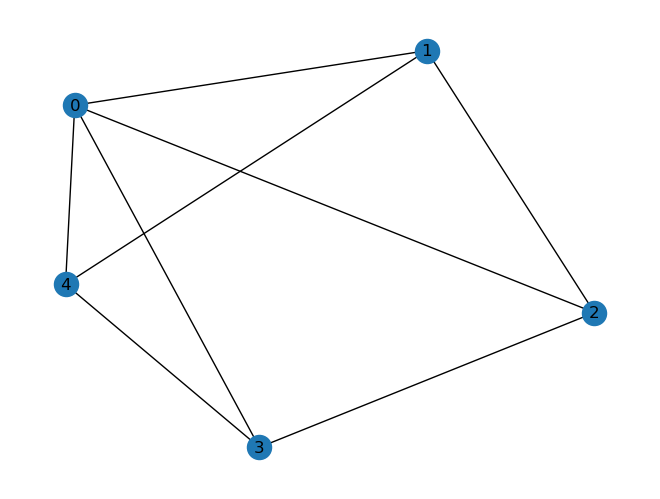

In [90]:
nx.draw(G, with_labels=True)

## Exercise 2

For each subgraph (each represents a synchronous zone), determine

- the number of transmission lines (aka edges) and buses (aka nodes)
- whether the network is planar
- the average number of transmission lines connecting to a bus
- the number of cycles forming the cycle basis
- the histogram of the length of the cycles (i.e. number of *edges* per cycle) in the cycle basis
- the average length of the cycles in the cycle basis?
- the adjacency matrix
- the incidence matrix
- the weighted Laplacian (weighted by line susceptance = 1 / line reactance)
- the PTDF matrix
- the network flows if the first bus generates 1 unit of power and the last bus consumes 1 unit of power
- Show the absolute flows in a plot using the [`.draw`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) function of `networkx` and the keyword argument `edge_color`. Plot the network on a figure with a size of 10x10 inches. Change the `width` of the edges to the value 4. 

In [91]:
G = subgraphs[3] # iterate here

In [92]:
len(G.nodes)

286

In [93]:
len(G.edges)

408

In [94]:
nx.is_planar(G)

False

In [95]:
pd.Series({k: v for k, v in G.degree}).mean()

2.8531468531468533

In [96]:
len(nx.cycle_basis(G))

123

In [97]:
cycle_length = pd.Series([len(c) for c in nx.cycle_basis(G)])

<Axes: ylabel='Frequency'>

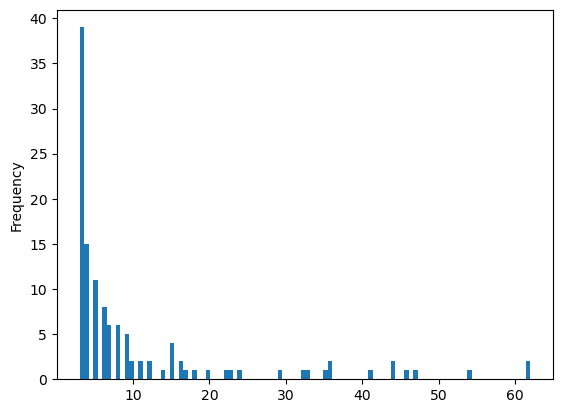

In [98]:
cycle_length.plot.hist(bins=100)

<Axes: >

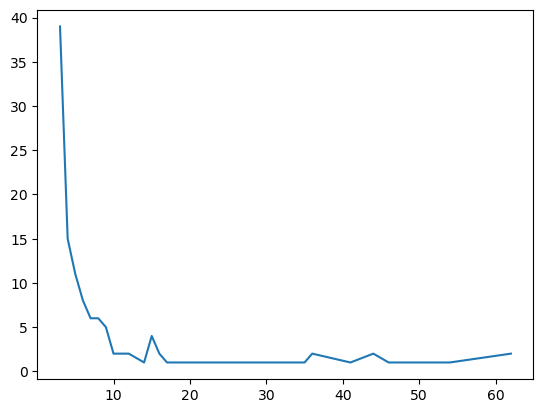

In [99]:
# alternative
pd.Series([len(c) for c in nx.cycle_basis(G)]).value_counts().sort_index().plot()

In [100]:
cycle_length.describe()

count    123.000000
mean      10.666667
std       12.942285
min        3.000000
25%        3.000000
50%        5.000000
75%       10.500000
max       62.000000
dtype: float64

In [101]:
nx.adjacency_matrix(G).todense()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [102]:
K = nx.incidence_matrix(G).todense()
K

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
x_pu = nx.get_edge_attributes(G, 'x_pu').values()
b = [1 / x for x in x_pu]
B = np.diag(b)

In [104]:
H = B.dot(K.T)

In [105]:
L = K.dot(H)

In [106]:
L_inv = np.linalg.pinv(L)

In [107]:
PTDF = H.dot(L_inv)

In [108]:
imbalance = np.zeros(len(G.nodes))
imbalance[0] = 1
imbalance[-1] = -1

In [109]:
flows = PTDF.dot(imbalance)

In [110]:
abs_flows = np.abs(flows)

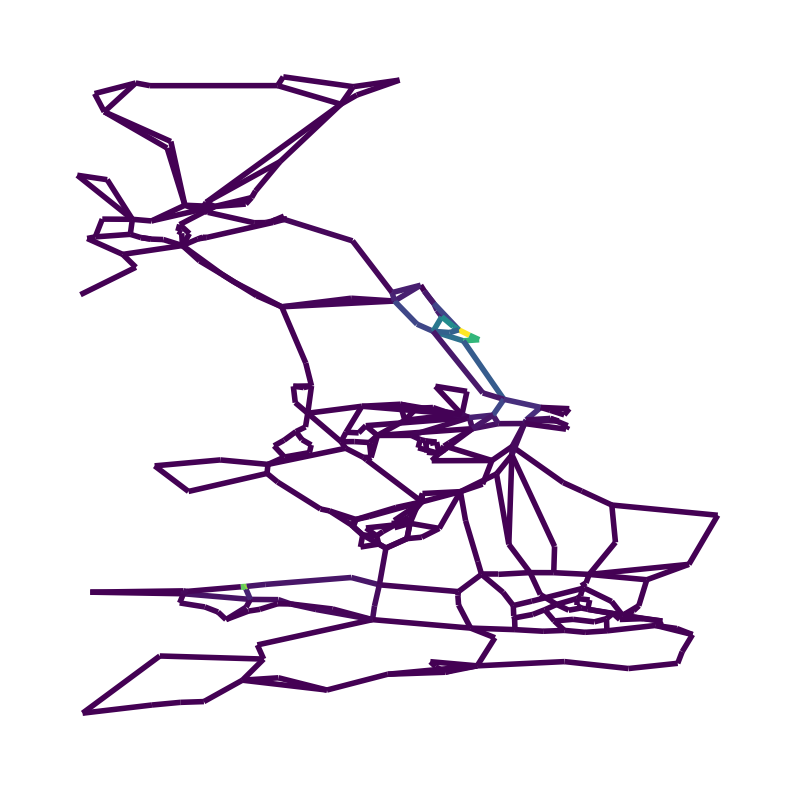

In [111]:
sub_pos = {k: v for k, v in pos.items() if k in G.nodes}
fig, ax = plt.subplots(figsize=(10,10))
nx.draw(G, pos=sub_pos, node_size=0, edge_color=abs_flows, width=4)